**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle

# В KNeighborsClassifier дефолтно используется мера "minkowski" с
# параметром "p = 2", что совпадает с стандартной евклидовой метрикой.

# Score в KNeighborsClassifier считается как 'accuracy',
# т.е. (TP + TN) / (TP + TN + FP + FN)


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    CHUNK = 100

    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X.copy().astype(float)
        self.X_sqr = (self.X ** 2).sum(axis=1)
        self.y = y.copy().astype(int)
        self.classes = np.unique(y)

    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)

    def predict_proba(self, X):
        counter = np.zeros([X.shape[0], self.classes.shape[0]])
        for i in range(np.ceil(X.shape[0] / float(self.CHUNK)).astype(int)):
            X_chunk = X[self.CHUNK * i: self.CHUNK * (i + 1)].astype(float)
            X_sqr = (X_chunk ** 2).sum(axis=1)
            dist = X_chunk.dot(self.X.T)
            dist = -2 * dist + self.X_sqr + X_sqr.reshape(-1, 1)
            dist_matrix = self.y[dist.argsort(axis=1)[:, :self.n_neighbors]]
            for j in range(X_chunk.shape[0]):
                unique, counts = np.unique(dist_matrix[j], return_counts=True)
                counter[i * self.CHUNK + j, unique] = counts
        return counter / self.n_neighbors

    def score(self, X, y):
        return (y.astype(int) == self.predict(X)).sum() / y.shape[0]

**IRIS**

In [40]:
iris = datasets.load_iris()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [42]:
clf = KNeighborsClassifier(n_neighbors=11)
my_clf = MyKNeighborsClassifier(n_neighbors=11)

In [43]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 5.68 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [44]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 ms


In [45]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.85 ms


array([0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1])

In [46]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.75 ms


array([0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1])

In [47]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.81 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.81818182, 0.18181818],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.09090909, 0.90909091],
       [0.        , 0.09090909, 0.90909091],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [36]:
%time my_clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.42 ms


array([[0.        , 0.72727273, 0.27272727],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.18181818, 0.81818182],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.45454545, 0.54545455],
       [0.        , 0.09090909, 0.90909091],
       [0.        , 0.18181818, 0.81818182],
       [1.        , 0.        , 0.        ]])

In [37]:
clf.score(X_test, y_test)

1.0

In [38]:
my_clf.score(X_test, y_test)

1.0

Sklearn: best n_neighbors = 5
My: best n_neighbors = 5


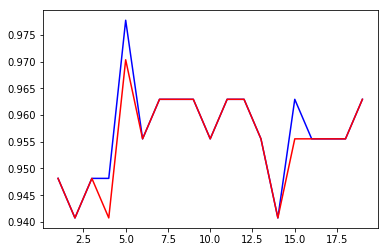

In [39]:
# %%pycodestyle
# Задание 3

# В качестве меры качества взял accuracy, чтобы мера
# совпадала с мерой метода score классификаторов

from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_neighbors": range(1, 20)
}

params = dict(cv=5, scoring='accuracy', return_train_score=True)

grid_search = GridSearchCV(clf, param_grid, **params)
grid_search.fit(X_train, y_train)

my_grid_search = GridSearchCV(my_clf, param_grid, **params)
my_grid_search.fit(X_train, y_train)

best_n = grid_search.best_estimator_.get_params()['n_neighbors']
my_best_n = my_grid_search.best_estimator_.get_params()['n_neighbors']

scores = grid_search.cv_results_['mean_test_score']
my_scores = my_grid_search.cv_results_['mean_test_score']
plt.plot(param_grid['n_neighbors'], scores, color='blue', label='clf')
plt.plot(param_grid['n_neighbors'], my_scores, color='red', label='my_clf')

print("Sklearn: best n_neighbors = {}".format(best_n))
print("My: best n_neighbors = {}".format(my_best_n))

**MNIST**

In [17]:
mnist = fetch_mldata('MNIST original')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [20]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 26s, sys: 3.02 s, total: 1min 29s
Wall time: 1min 30s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9.51 s, sys: 18.3 s, total: 27.8 s
Wall time: 30 s


In [22]:
%time clf.predict(X_test)

CPU times: user 12min 21s, sys: 0 ns, total: 12min 21s
Wall time: 13min 10s


array([9., 8., 3., ..., 0., 4., 4.])

In [23]:
%time my_clf.predict(X_test)

CPU times: user 1min 16s, sys: 6.14 s, total: 1min 22s
Wall time: 1min 40s


array([9, 8, 3, ..., 0, 4, 4])

In [24]:
%time clf.predict_proba(X_test)

CPU times: user 12min 3s, sys: 388 ms, total: 12min 4s
Wall time: 12min 28s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [25]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 6.86 s, total: 1min 13s
Wall time: 1min 15s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [26]:
clf.score(X_test, y_test)

0.9668571428571429

In [27]:
my_clf.score(X_test, y_test)

0.9668571428571429

Задание 5

In [ ]:
# seaborn - Библиотека инструментов для создания графиков. Основана на matplotlib.

# matplotlib - Библиотека для визуализации, содержит базовые функции и классы для создания различного рода графиков.

# train_test_split - Функция, разбивающая данные на тренировочные и тестовые.
# Данные разбиваются с заданным соотношением, но содержание этих разбиений случайно.

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Класс, позволяющий создать наборы действий
# с указанными параметрами, которые совершаются над входными данными.
# Служит для унификации последовательности обработки данных.

# StandardScaler (from sklearn.preprocessing import StandardScaler) - Класс, нормализующий входные данные,
# т.е. отнимает среднее значение и делит на среднеквадратическое отклонение

# ClassifierMixin - Класс, добавляемые к списку классов от которых наследуется создаваемые классификатор
# и расширающий основной класс-предок стандартными возможностями

# NeighborsBase - Базовый класс, от которого наследуются классы-классификаторы KNN

# KNeighborsMixin - Класс, расширающий возможности NeighborsBase - добавляет две функции kneighbors(находит k
# ближайших к точке соседей) и kneighbors_graph (возвращает матрицу связей между точками(соседи\не соседи)
# или расстояние между точками)

# SupervisedIntegerMixin - Добавляем метод fit, позволяющий обучить классификатор используя X как тренировочные
# данные и y как целевую переменную.